In [1]:
import gym
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.version

'2.7.13 |Anaconda 4.3.1 (x86_64)| (default, Dec 20 2016, 23:05:08) \n[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]'

In [2]:
env = gym.make('CartPole-v0')

[2017-05-27 17:16:08,495] Making new env: CartPole-v0


In [3]:
def run_episode(env, weights):
    observation = env.reset()
    total_reward = 0
    for t in range(200):
        y = observation.dot(weights)
        action = 0 if y < 0 else 1
        observation, reward, done, info = env.step(action)
        total_reward += reward
        if done:
            break
    return total_reward

### Random search

In [4]:
best_reward = 0
weights = np.random.uniform(-1,1,4)
best_weights = weights
reward_history = []
for i in range(1000):
    weights = np.random.uniform(-1,1,4)
    reward = run_episode(env, weights) 
    reward_history.append(reward)
    if reward > best_reward:
        best_weights = weights
        best_reward = reward

In [5]:
run_episode(env, best_weights)

47.0

In [11]:
observation = env.reset()
for t in range(200):
    env.render()
    y = observation.dot(best_weights)
    action = 0 if y < 0 else 1
    observation, reward, done, info = env.step(action)
    if done:
        env.render(close=True)
        break
        

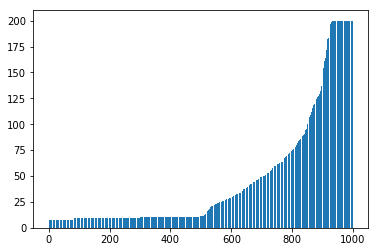

In [7]:
x = np.arange(len(reward_history))
plt.bar(x, sorted(reward_history))
plt.show()

### Hill climbing

In [12]:
best_weights = np.random.uniform(-1,1,4)
reward_history = []
for i in range(50):
    reward = 0
    weights = np.random.uniform(-1,1,4)
    new_weights = weights
    for j in range(500):
        new_weights = weights + np.random.normal(0,.1,4)
        new_reward = run_episode(env, new_weights) 
        if new_reward > reward:
            weights = new_weights
            reward = new_reward
    reward_history.append(reward)
    if reward > best_reward:
        best_weights = weights
        best_reward = reward

In [13]:
observation = env.reset()
for t in range(200):
    env.render()
    y = observation.dot(best_weights)
    action = 0 if y < 0 else 1
    observation, reward, done, info = env.step(action)
    if done:
        env.render(close=True)
        break

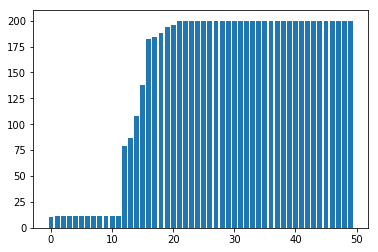

In [14]:
x = np.arange(len(reward_history))
plt.bar(x, sorted(reward_history))
plt.show()